In [1]:
import matplotlib.pyplot as plt
# The image should be in the working directory or a full path of image should be given.
import cv2

In [2]:
frame=cv2.imread("goku.jpg")

In [3]:
frame

array([[[250, 202,  70],
        [241, 195,  64],
        [248, 206,  77],
        ...,
        [248, 210, 108],
        [248, 210, 108],
        [248, 210, 108]],

       [[254, 205,  73],
        [241, 192,  62],
        [245, 200,  72],
        ...,
        [246, 210, 110],
        [246, 210, 110],
        [246, 210, 110]],

       [[250, 195,  66],
        [245, 195,  65],
        [252, 205,  77],
        ...,
        [247, 211, 111],
        [247, 211, 111],
        [247, 211, 111]],

       ...,

       [[124, 150, 197],
        [133, 159, 206],
        [121, 144, 192],
        ...,
        [ 52, 117,  41],
        [ 51, 115,  43],
        [ 50, 112,  46]],

       [[128, 154, 201],
        [127, 153, 200],
        [130, 153, 201],
        ...,
        [ 53, 118,  42],
        [ 54, 118,  46],
        [ 54, 116,  50]],

       [[128, 154, 201],
        [127, 153, 200],
        [130, 153, 201],
        ...,
        [ 53, 119,  40],
        [ 54, 118,  46],
        [ 54, 116,  50]]

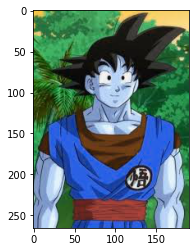

In [4]:
#problem with open cv is it is BGR instead of RGB
#color is reversed
plt.imshow(frame)

In [5]:
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
#Use the function cv2.imshow() to display an image in a window. The window automatically fits to the image size.

In [7]:
#cvtColor:  to convert images from one color-space to another, like BGR to Gray, BGR to HSV etc.
rgb=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)

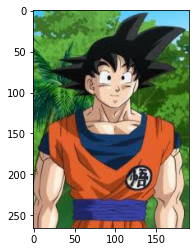

In [9]:
plt.imshow(rgb)